In [1]:
# the cnn module provides classes for training/predicting with various types of CNNs
from opensoundscape.torch.models.cnn import CNN

#other utilities and packages
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
import random
import subprocess

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

In [2]:
subprocess.run(['curl','https://pitt.box.com/shared/static/79fi7d715dulcldsy6uogz02rsn5uesd.gz','-L', '-o','woodcock_labeled_data.tar.gz']) # Download the data
subprocess.run(["tar","-xzf", "woodcock_labeled_data.tar.gz"]) # Unzip the downloaded tar.gz file
subprocess.run(["rm", "woodcock_labeled_data.tar.gz"]) # Remove the file after its contents are unzipped

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100     7    0     7    0     0      5      0 --:--:--  0:00:01 --:--:--  7000
100 9499k  100 9499k    0     0  3925k      0  0:00:02  0:00:02 --:--:-- 15.6M


CompletedProcess(args=['rm', 'woodcock_labeled_data.tar.gz'], returncode=0)

In [3]:
#load Specky output: a table of labeled audio files
specky_table = pd.read_csv(Path("woodcock_labeled_data/woodcock_labels.csv"))
specky_table.head()

,filename,woodcock,sound_type
0,d4c40b6066b489518f8da83af1ee4984.wav,present,song
1,e84a4b60a4f2d049d73162ee99a7ead8.wav,absent,na
2,79678c979ebb880d5ed6d56f26ba69ff.wav,present,song
3,49890077267b569e142440fa39b3041c.wav,present,song
4,0c453a87185d8c7ce05c5c5ac5d525dc.wav,present,song


In [4]:
#update the paths to the audio files
specky_table.filename = ['./woodcock_labeled_data/'+f for f in specky_table.filename]
specky_table.head()

,filename,woodcock,sound_type
0,./woodcock_labeled_data/d4c40b6066b489518f8da8...,present,song
1,./woodcock_labeled_data/e84a4b60a4f2d049d73162...,absent,na
2,./woodcock_labeled_data/79678c979ebb880d5ed6d5...,present,song
3,./woodcock_labeled_data/49890077267b569e142440...,present,song
4,./woodcock_labeled_data/0c453a87185d8c7ce05c5c...,present,song


In [5]:
# create a new dataframe with the filenames from the previous table as the index
labels = pd.DataFrame(index=specky_table['filename'])

#convert 'present' to 1 and 'absent' to 0
labels['woodcock']=[1 if l=='present' else 0 for l in specky_table['woodcock']]

In [6]:
from sklearn.model_selection import train_test_split
train_df,validation_df = train_test_split(labels,test_size=0.2,random_state=1)

In [7]:
from opensoundscape.torch.models.cnn import load_model
import os

# Create model object
classes = train_df.columns #in this case, there's just one class: ["woodcock"]
# Specify path to model
model_path = './bird_training/best.model'
if os.path.exists(model_path):
    model = load_model(model_path)
else:
  
    #changed this from 2 to 10, would that split files to 10 sec instead of 2?
    model = CNN('resnet18',classes=classes,sample_duration= 10.0)
   
    model.train(
    train_df= train_df,
    validation_df=validation_df,
    save_path='./bird_training/', #where to save the trained model
    epochs=15, #number of times it goes through every single training data once. so 15 dots in graph
    batch_size=10,
    save_interval=150, #save model every 5 epochs (the best model is always saved in addition)
    num_workers=0, #specify 4 if you have 4 CPU processes, eg; 0 means only the root process
)


    model.save('./bird_training/best.model')
    model = load_model(model_path)


/root/bird/kitzes/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/bird/kitzes/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Training Epoch 0
Epoch: 0 [batch 0/3 (0.00%)] 
	DistLoss: 0.776
Metrics:
Metrics:
	MAP: 0.791

Validation.
[]
Metrics:
	MAP: 0.967

Training Epoch 1
Epoch: 1 [batch 0/3 (0.00%)] 
	DistLoss: 0.719
Metrics:
Metrics:
	MAP: 0.698

Validation.
[]
Metrics:
	MAP: 1.000

Training Epoch 2
Epoch: 2 [batch 0/3 (0.00%)] 
	DistLoss: 1.196
Metrics:
Metrics:
	MAP: 0.693

Validation.
[]
Metrics:
	MAP: 0.927

Training Epoch 3
Epoch: 3 [batch 0/3 (0.00%)] 
	DistLoss: 1.690
Metrics:
Metrics:
	MAP: 0.794

Validation.
[]
Metrics:
	MAP: 0.967

Training Epoch 4
Epoch: 4 [batch 0/3 (0.00%)] 
	DistLoss: 1.095
Metrics:
Metrics:
	MAP: 0.836

Validation.
[]
Metrics:
	MAP: 1.000

Training Epoch 5
Epoch: 5 [batch 0/3 (0.00%)] 
	DistLoss: 1.261
Metrics:
Metrics:
	MAP: 0.797

Validation.
[]
Metrics:
	MAP: 1.000

Training Epoch 6
Epoch: 6 [batch 0/3 (0.00%)] 
	DistLoss: 1.548
Metrics:
Metrics:
	MAP: 0.888

Validation.
[]
Metrics:
	MAP: 1.000

Training Epoch 7
Epoch: 7 [batch 0/3 (0.00%)] 
	DistLoss: 0.723
Metrics:
Me

/root/bird/kitzes/lib/python3.8/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


Text(0, 0.5, 'loss')

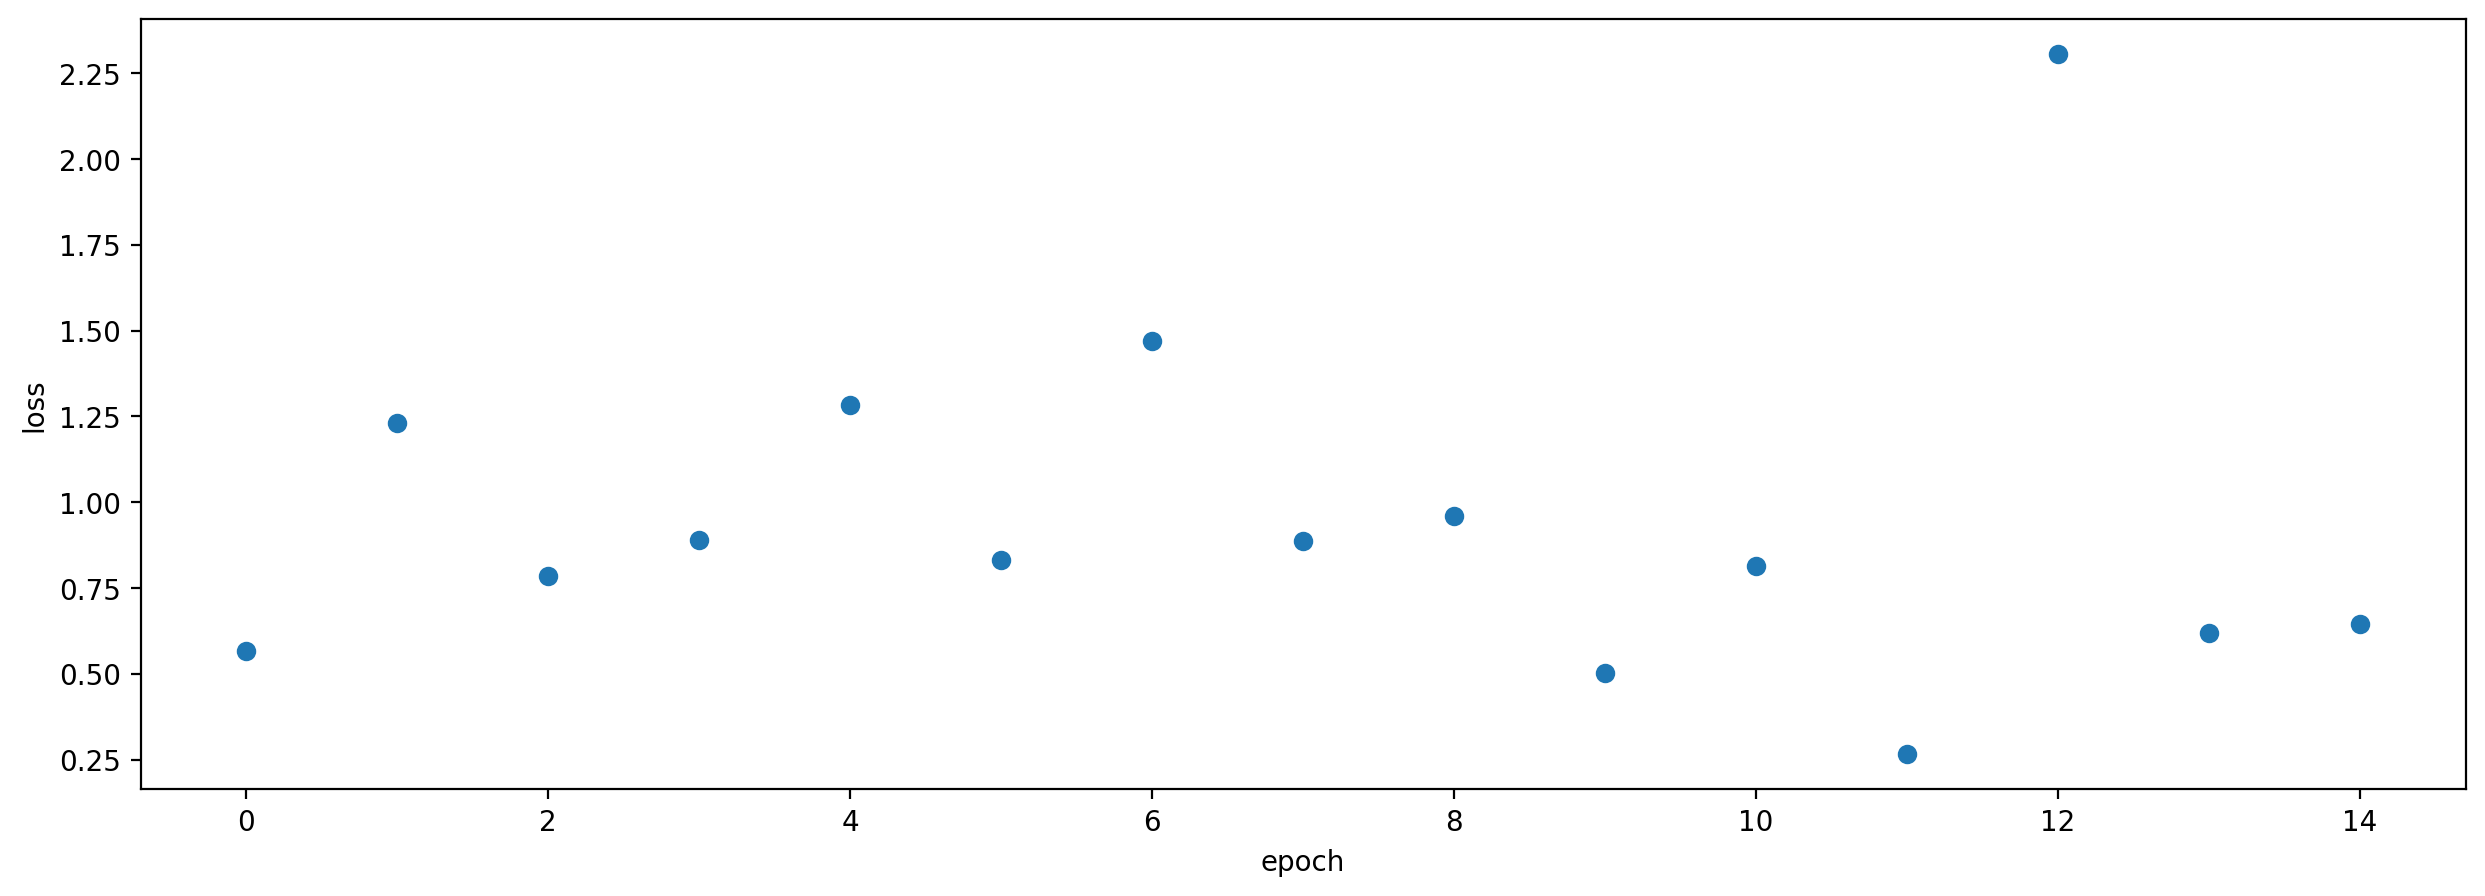

In [8]:
plt.scatter(model.loss_hist.keys(),model.loss_hist.values())
plt.xlabel('epoch')
plt.ylabel('loss')

In [9]:
from glob import glob
field_recordings = glob('./*.WAV')
field_recordings

['./20220601_053000.WAV',
 './20220601_063000.WAV',
 './20220601_083000.WAV',
 './20220601_073000.WAV']

In [10]:
#WORKING FOR OVERALL
import os

#write to csv
# Predict on audio files
valid_scores = model.predict(
    field_recordings,
    activation_layer='sigmoid',
    split_files_into_clips=False
    #idk what the difference is between True or False here ^
)

# Extract the DataFrame from the tuple and remove unnecessary elements
scores_df = valid_scores[0]
scores_df.index = [os.path.basename(f) for f in field_recordings]

# Add a new column 'Presence' based on the value of 'woodcock' column
scores_df['Presence'] = ['Present' if score > 0.9 else 'Absent' for score in scores_df['woodcock']]

# Save the DataFrame to a CSV file
scores_df.to_csv('copyWoodcock.csv')

[]


In [11]:
#WORKING TEST WORK ON THIS THIS COULD GIVE ANSWER
#WORKS FOR SPLITTING INTO 2 SECOND CLIPS WITH ONE SECOND OVERLAP
import os
# import Audio and Spectrogram classes from OpenSoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

#clip_df is a DATAFRAME, which model.precict can not take The function returns a list containing Audio objects for each clip and a DataFrame giving the start and end times of each clip with respect to the original file.
audio_filename = ['20220601_053000.WAV']

#predict method returns a LIST of dataframes, so in this case, prediction_scores_df is list of one dataframe
prediction_scores_df = model.predict(audio_filename, activation_layer='sigmoid', overlap_fraction = .5)
prediction_scores_df[0].head()


# Add a new column 'Presence' based on the value of 'woodcock' column
prediction_scores_df[0]['Presence'] = ['Present' if float(score) > 0.9 else '' for score in prediction_scores_df[0]['woodcock']]



prediction_scores_df[0].to_csv("copy_withOverlap.csv")

[]
